In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/online_retail.csv', encoding='ISO-8859-1', dtype={'InvoiceID': str, 'CustomerID': str})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


# 결측치 확인

In [8]:
# 결측치 확인
df.isnull().sum() # 1(True)면 더해지고 0(False)면 안 더해짐.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# 결측치 처리: 사용자나 상품이 null인 경우
df = df.dropna()
print(df.isnull().sum())

df.info()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


# 이상치 확인

In [10]:
# Quantity, UnitPrice 수량과 가격에 대해 이상치를 확인.
print((df['Quantity'] <= 0).sum()) # 8905개가 수량이 음수 (이상치)
df = df[df['Quantity'] > 0]
print((df['Quantity'] <= 0).sum())

8905
0


In [11]:
print((df['UnitPrice'] <= 0).sum())
df = df[df['UnitPrice'] > 0]
print((df['UnitPrice'] <= 0).sum())

40
0


In [12]:
# 상품 코드가 잘못 입력된 경우 제거 - 상품 코드는 숫자로만 구성
df['ContainDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].sum())

df = df[df['ContainDigit'] == True]

InvoiceNo       5363705364035365275365695365695367795368405368...
StockCode       POSTPOSTPOSTMMBANK CHARGESPOSTPOSTPOSTPOSTPOST...
Description     POSTAGEPOSTAGEPOSTAGEManualManualBank ChargesP...
Quantity                                                    10324
UnitPrice                                               96550.134
CustomerID      1258312791126621627416274158231273812686135201...
Country         FranceNetherlandsGermanyUnited KingdomUnited K...
ContainDigit                                                    0
dtype: object


<ipython-input-12-5da91a3817ea>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df[df['ContainDigit'] == False].sum())


<Axes: xlabel='InvoiceDate'>

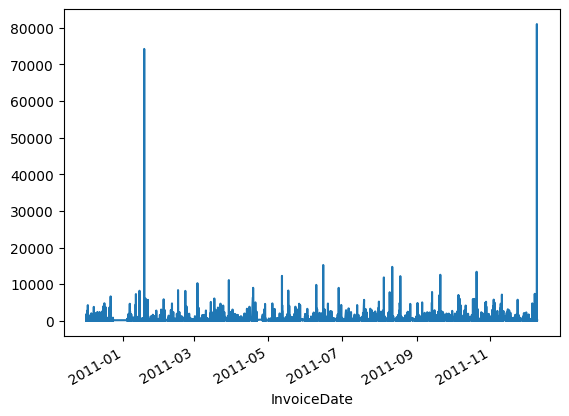

In [13]:
# 일자별 거래 수량을 확인
data_quantity_series = df.groupby('InvoiceDate')['Quantity'].sum()
data_quantity_series.plot()

<Axes: xlabel='InvoiceDate'>

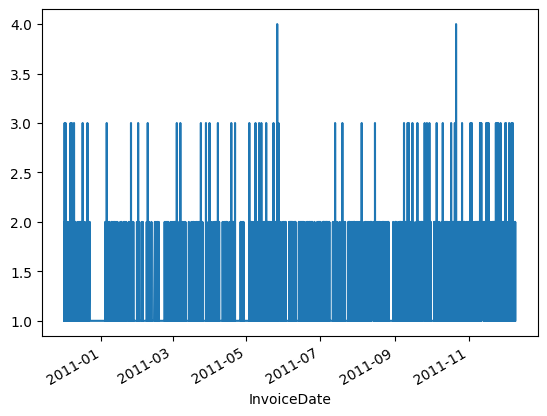

In [14]:
# 일자별 거래 수량을 확인
data_transaction_series = df.groupby('InvoiceDate')['InvoiceNo'].nunique()
data_transaction_series.plot()

<Axes: xlabel='InvoiceDate'>

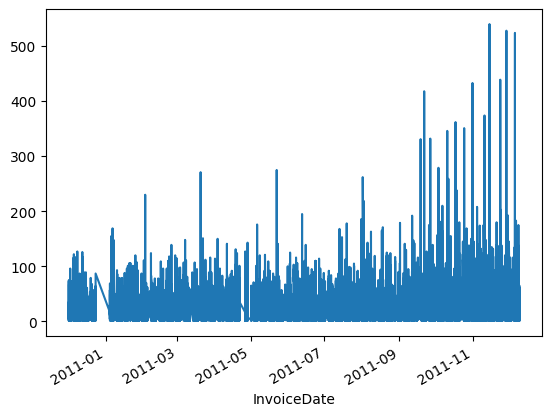

In [15]:
# 일자별 거래 수량을 확인
# InvoiceDate는 ss 까지 표현.
data_unique_item_series = df.groupby('InvoiceDate')['StockCode'].nunique()
data_unique_item_series.plot()

<Axes: xlabel='date'>

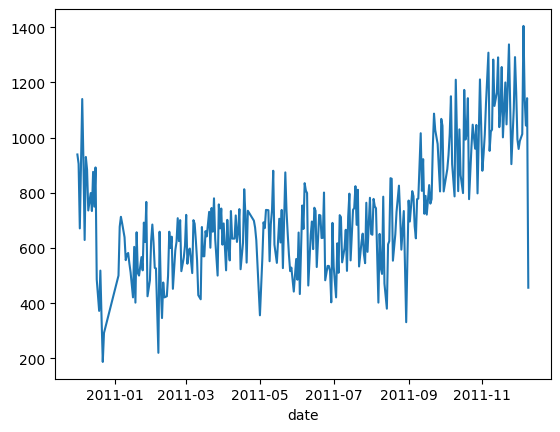

In [16]:
df['date'] = df['InvoiceDate'].dt.date
data_unique_item_series = df.groupby('date')['StockCode'].nunique()
data_unique_item_series.plot()


In [17]:
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


Axes(0.125,0.11;0.775x0.77)


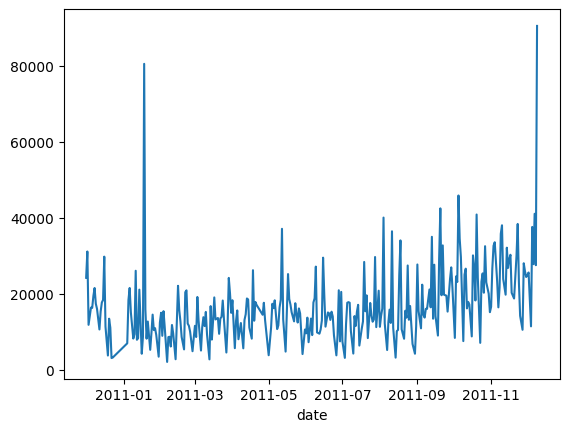

In [18]:
# 일 별로 거래 수량의 합을 확인
date_quantity_series = df.groupby('date')['Quantity'].sum()
print(date_quantity_series.plot())

<Axes: xlabel='date'>

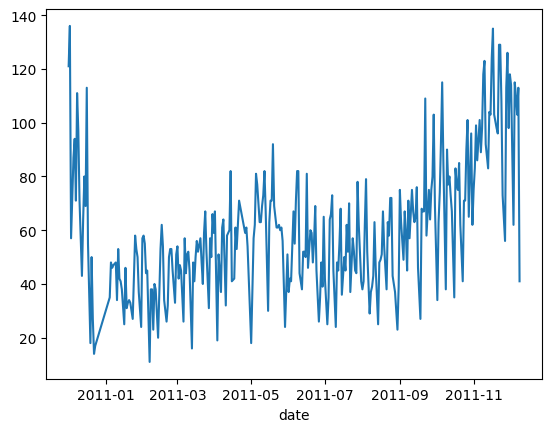

In [19]:
# 날짜 별로 거래 수량의 합을 확인
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series .plot()

In [20]:
# 유저 별 거래 횟수를 탐색
customer_unique_transaction_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

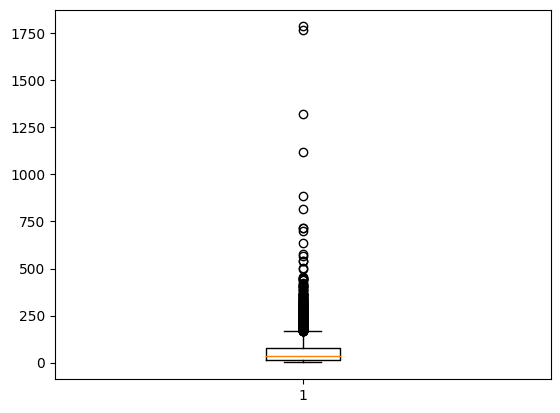

In [21]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [22]:
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

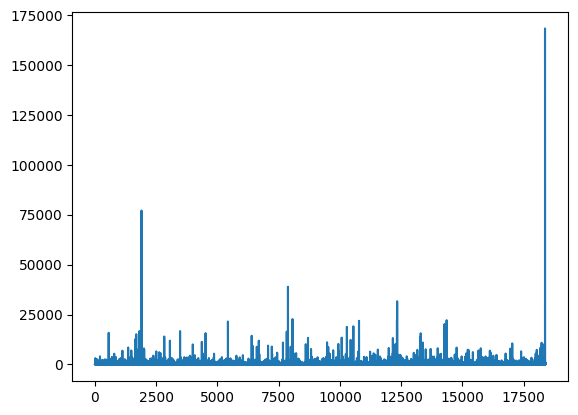

In [23]:
# 파생 변수 생성 - 다른 속성을 가지고 계산이 가능한 필드를 추가
# Customizing 과정에서는 자주 사용된다면 미리 만들어두는 것이 효율이 좋다고 함
df['amount'] = df['Quantity'] * df['UnitPrice']
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)

In [25]:
# 데이터를 특정 시점으로 분리
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


In [28]:
import datetime

df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]

customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {22374, 84969, 85167B, 23084, 21791, 23172, 22...
12348    {21213, 21985, 21977, 23078, 84992, 22951, 217...
12350    {21832, 21908, 21866, 21864, 20652, 22620, 840...
12352    {22980, 22138, 22784, 22780, 22844, 22630, 217...
                               ...                        
18280    {22725, 22467, 22499, 22727, 22611, 22180, 224...
18281    {22716, 22467, 22028, 23209, 22037, 23007, 23008}
18282    {23295, 22424, 21270, 21108, 22089, 23187, 21109}
18283    {21977, 21870, 22352, 23494, 22951, 23373, 850...
18287    {22757, 23267, 21819, 22755, 47421, 23078, 849...
Name: StockCode, Length: 3970, dtype: object


In [31]:
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {22374, 84969, 85167B, 23084, 21791, 23172, 22...
12348    {21213, 21985, 21977, 23078, 84992, 22951, 217...
12350    {21832, 21908, 21866, 21864, 20652, 22620, 840...
12352    {22980, 22138, 22784, 22780, 22844, 22630, 217...
                               ...                        
18280    {22725, 22467, 22499, 22727, 22611, 22180, 224...
18281    {22716, 22467, 22028, 23209, 22037, 23007, 23008}
18282    {23295, 22424, 21270, 21108, 22089, 23187, 21109}
18283    {21977, 21870, 22352, 23494, 22951, 23373, 850...
18287    {22757, 23267, 21819, 22755, 47421, 23078, 849...
Name: StockCode, Length: 3970, dtype: object


In [32]:
customer_item_dict = {}

for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'
print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'22374': 'old', '84969': 'old', '85167B': 'old', '23084': 'old...


In [34]:
# 11월 이후에 구매한 상품의 중복을 제거
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)

print(customer_item_end_set)

# 11월 이전에만 구매한 상품은 old 11월 이후에만 구매한 상품은 new
# 양쪽 다 구매한 것이면 both - 주기를 파악할 필요가 있다.

CustomerID
12347    {23508, 23271, 84625A, 23552, 23497, 23084, 21...
12349    {20685, 22326, 22832, 23293, 22131, 22070, 232...
12352    {23368, 22978, 23559, 23096, 22624, 22635, 233...
12356                                       {21843, 22423}
12357    {23494, 22070, 22059, 22947, 22333, 84029G, 84...
                               ...                        
18272    {23240, 23494, 22969, 22076, 23236, 22075, 231...
18273                                             {79302M}
18274    {84509A, 23243, 21974, 21231, 22851, 22423, 22...
18282                  {22818, 22423, 23175, 23174, 22699}
18283    {21985, 23681, 22951, 85099F, 21791, 23349, 22...
Name: StockCode, Length: 1904, dtype: object


In [36]:
for customer_id, stocks in customer_item_end_set.items():
    if customer_id in customer_item_dict:
        for stock in stocks:
            if stock in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock] = 'both'
            else:
                customer_item_dict[customer_id][stock] = 'new'

    # 이 경우는 이전에 구매한 상품인지 확인할 필요가 없다.
    else:
        customer_item_dict[customer_id] = {}
        for stock in stocks:
            customer_item_dict[customer_id][stock] = 'new'

print(str(customer_item_dict)[:100])

{'12346': {'23166': 'old'}, '12347': {'22374': 'old', '84969': 'old', '85167B': 'old', '23084': 'bot


In [63]:
import warnings
warnings.filterwarnings('ignore')

# 고객 별로 old와 new와 both의 개수를 파악
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0

    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old = old + 1
        elif status == 'new':
            new = new + 1
        else:
            both = both + 1

    # DataFrame에 개수를 추가
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)


In [64]:

# 11월 이후에 새로운 상품을 구매한 유저 수
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

# 동일한 제품을 재구매한 고객 수 - 구매 주기를 확인할 필요가 있다.
# 식료품이라면 미리 알림을 주는 것도 좋은 마케팅 방법 중 하나.
print(df_order_info[df_order_info['both'] > 0].shape[0])

0
1904


In [67]:
# 11월 이후에 어떤 상품을 새로 구매 많이 했는지 확인
df_order_info['new'].value_counts()

0    4334
Name: new, dtype: int64